# A/B Testing Assignment

In [1]:
%reload_ext nb_black
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

### Import the [Absenteeism at Work data set](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv). 

**Note:** The the delimiter of the file is a semi-colon (;), so you will need to set `sep=';'`.

In [2]:
data = "Absenteeism_at_work.csv"
df = pd.read_csv(data, sep=";")

<IPython.core.display.Javascript object>

## Confidence Intervals

Suppose this company is analyzing the health of its employees and is specifically interested in their Body Mass Index (BMI). Generate a 95% confidence interval of the mean for that field.

In [5]:
#Dont think this one is right
_mean = df["Body mass index"].mean()
_std = df["Body mass index"].std()
_n = df["Body mass index"].count()

stde = _std / np.sqrt(_n)

ci_lo = _mean - (1.96) * stde
ci_hi = _mean + (1.96) * stde

(ci_lo, ci_hi)


(26.36825576762484, 26.985798286429212)

<IPython.core.display.Javascript object>

In [4]:
#This is the correct CI
bmi_mean = df["Body mass index"].mean()
ci_low = np.percentile(df["Body mass index"], 2.5)
ci_high = np.percentile(df["Body mass index"], 97.5)
(ci_low, ci_high)

(19.0, 37.049999999999955)

<IPython.core.display.Javascript object>

### Visualizing Confidence Intervals

Generate a sampling distribution of the mean for the Body Mass Index field. Create a histogram to visualize the sampling distribution and add an indicator showing the lower and upper bounds of the confidence interval.

In [7]:
mean_diffs = []

for i in range(1000):
    sample = df["Body mass index"].sample(frac=1.0, replace=True)
    mean_diffs.append(sample.mean())


ci_lo = np.percentile(mean_diffs, 2.5)
ci_hi = np.percentile(mean_diffs, 97.5)

<IPython.core.display.Javascript object>

In [8]:
(ci_lo, ci_hi)

(26.38918918918919, 26.97706081081081)

<IPython.core.display.Javascript object>

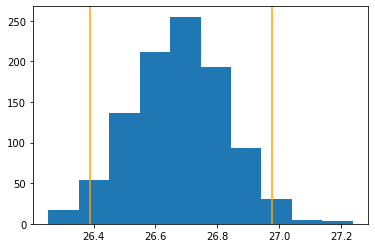

<IPython.core.display.Javascript object>

In [9]:
plt.hist(mean_diffs)
plt.axvline(ci_lo, c="orange")
plt.axvline(ci_hi, c="orange")

### Confidence Intervals by Group

Suppose we wanted to examine whether there was a difference in the BMIs of employees who drink socially and those that do not. Use the Social Drinker field to split the employees into groups, and then compute the confidence intervals for each group. What insights can you derive from the results?

In [10]:
drinks = df[df["Social drinker"] == 1]
doesnt = df[df["Social drinker"] == 0]

get_95_ci(drinks["Body mass index"], doesnt["Body mass index"])

(2.2105132913782177, 3.390677184812264)

<IPython.core.display.Javascript object>

In [11]:
drinks["Body mass index"].count()

420

<IPython.core.display.Javascript object>

In [12]:
doesnt["Body mass index"].count()

320

<IPython.core.display.Javascript object>

### Sampling Distributions for Each Group

Next, let's generate a sampling distribution of the mean for each group and generate a plot containing both of their histograms to see if there is any overlap.

In [13]:
mean_diffs = []

for i in range(1000):
    drinks_sample = drinks["Body mass index"].sample(frac=1.0, replace=True)
    doesnt_sample = doesnt["Body mass index"].sample(frac=1.0, replace=True)
    mean_diff = drinks_sample.mean() - doesnt_sample.mean()
    mean_diffs.append(mean_diff)

ci_lo = np.percentile(mean_diffs, 2.5)
ci_hi = np.percentile(mean_diffs, 97.5)

<IPython.core.display.Javascript object>

In [14]:
(ci_lo, ci_hi)

(2.2065587797619024, 3.4156473214285734)

<IPython.core.display.Javascript object>

## A/B Testing

Based on our analysis so far, we would like to perform a t-test to determine whether there is a difference in BMI means between our two groups (social drinkers and non-social drinkers). Conduct an independent sample t-test and determine whether the differences between the groups is statistically significant. What is your conclusion?

In [15]:
drinks = df[(df["Social drinker"] == 1) & (df["Social smoker"] == 0)]
smokes = df[(df["Social smoker"] == 1) & (df["Social drinker"] == 0)]

stats.ttest_ind(drinks["Body mass index"], smokes["Body mass index"])

Ttest_indResult(statistic=6.059361351798191, pvalue=2.9779042111582565e-09)

<IPython.core.display.Javascript object>

## Confidence Intervals for Group Differences

Generate a 95% confidence interval for the mean difference in BMI between the two groups. Compute the interval using both the traditional method and bootstrapping and compare the results. What conclusions can you draw from the comparison? How would you present a summary of your results to stakeholders?

In [16]:
def get_95_ci(x1, x2):
    """Calculate a 95% CI for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return ci_lo, ci_hi

<IPython.core.display.Javascript object>

In [17]:
get_95_ci(drinks["Body mass index"], smokes["Body mass index"])

(2.867539781199986, 5.920695512917662)

<IPython.core.display.Javascript object>

In [18]:
mean_diffs = []

for i in range(10000):
    d_sample = drinks["Body mass index"].sample(frac=1.0, replace=True)
    s_sample = smokes["Body mass index"].sample(frac=1.0, replace=True)
    mean_diff = d_sample.mean() - s_sample.mean()
    mean_diffs.append(mean_diff)

ci_lo = np.percentile(mean_diffs, 2.5)
ci_hi = np.percentile(mean_diffs, 97.5)

<IPython.core.display.Javascript object>

In [19]:
(ci_lo, ci_hi)

(2.7739227941176465, 5.824437500000003)

<IPython.core.display.Javascript object>